# Get HRRR Forecast and Plot Data

#### For help with Pygrib, see the link below
https://jswhit.github.io/pygrib/docs/index.html

In [44]:
import pygrib
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

### Input kwargs and get HRRR data

In [71]:
date = '20200715' # YYYYMMDD
modelRun = '00' # HH
forecastHour = '00' # HH

# From Pando for now, can change to s3 bucket when ready
path = '/uufs/chpc.utah.edu/common/home/horel-group7/Pando/hrrr/sfc/'+date
hrrrFile = '/hrrr.t'+modelRun+'z.wrfsfcf'+forecastHour+'.grib2'


grbs = pygrib.open(path+hrrrFile)

# Select the variable you want
gh = grbs.select(shortName='gh',level=500)

# Extract the values
geopotentialHeight500 = gh[0].values
height500dM = geopotentialHeight500/10.
height500dM = np.round(height500dM)

# Get the lat/lon grids
lats, lons = gh[0].latlons()

grbs.close()

### Plot the Data

Text(0.5, 1.0, '500 mb Heights')

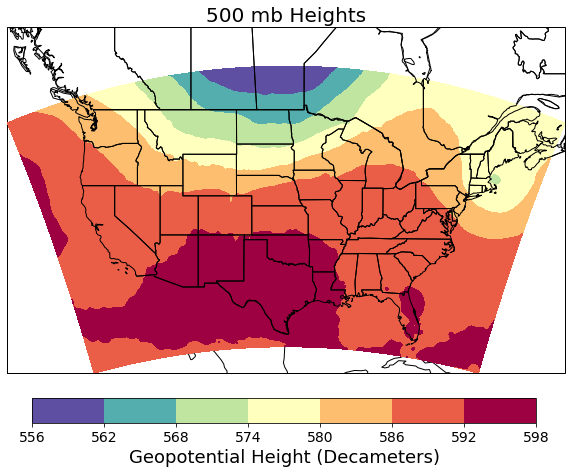

In [75]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.Mercator())

ax.coastlines()
ax.set_extent([lons.min(),lons.max(),lats.min(),lats.max()-3])
states = cartopy.feature.NaturalEarthFeature(
            category='cultural', scale='50m', facecolor='none',
            name='admin_1_states_provinces_shp')

# Contour lines in 60 m intervals
clevs = np.arange(np.min(height500dM),np.max(height500dM)+6,6)
cmap = plt.cm.get_cmap('Spectral_r')
norm = mcolors.BoundaryNorm(clevs,cmap.N)

ax.add_feature(states,edgecolor='black',zorder=99)
ax.add_feature(cartopy.feature.BORDERS,edgecolor='black',zorder=99)

cs = ax.contourf(lons,lats,height500dM,clevs,cmap=cmap,
                norm=norm,transform=ccrs.PlateCarree(),zorder=98)

cb_ax = fig.add_axes([.16,.10,.7,.4],visible=None)
cbar = plt.colorbar(cs,ax=cb_ax,orientation='horizontal')
cbar.set_label('Geopotential Height (Decameters)',size=18)
cbar.ax.tick_params(labelsize=14)
ax.set_title('500 mb Heights',fontsize=20)